In [2]:
import pandas as pd
import sys
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats.mstats import theilslopes
from scipy import stats
import os
Oss_path="/content/Regressione"

In [107]:
class FileCsv:
    def __init__(self):
        self.percorsi_file = []
        self.slope=[]
        self.intecept=[]
        self.Y11value=["byte sent"]
        self.Y12value=["byte sent","byte rec","nmail"]

        self.Y21value=["LIN1_VmSize","LIN1_VmData","LIN1_RSS","LIN1_byte_letti_I_O"]
        self.Y22value=["LIN2_VmSize","LIN2_VmData","LIN2_RSS","LIN2_byte_letti__sec","LIN2_byte_scritti__sec"]
        self.Y23value=["LIN4_VmSize","LIN4_VmData","LIN4RSS","LIN4_byte_letti__sec"]

        self.Y31value=["Allocated Heap"]
        self.Y32value=["allocated heap"]
        self.IndexY=0
        self.Xvalue=["observation","TIME","T"]
        self.IndexI=0
        self.spreed_sheet=["EXP1","EXP2","OSS1","OSS2","OSS3","VM1","VM2","VM3"]
        self.IndexZ=0
        self.i1=0
        self.i2=0
        self.istato=0

    def aggiungi_percorso_file(self, percorso):
        self.percorsi_file.append(percorso)

    def ConvertiFormatoCSV(self):
      for file_path in self.percorsi_file:
           # print(f"file_path '{file_path}'")
            df = pd.read_csv(file_path)
            # Specifica il percorso del tuo file CSV di input e di output
            # Apri il file di input in modalità lettura
            with open(file_path, 'r', newline='', encoding='utf-8') as input_file:
                # Leggi i dati dal file CSV utilizzando il separatore ";"
                reader = csv.reader(input_file, delimiter=';')
                data = list(reader)
            # Apri il file di output in modalità scrittura
            with open(file_path, 'w', newline='', encoding='utf-8') as output_file:
                # Scrivi i dati nel nuovo file CSV utilizzando il separatore ","
                writer = csv.writer(output_file, delimiter=',')
                writer.writerows(data)

    def CalcolaExp(self):
                    x_column = self.Xvalue[self.IndexI]
                    for self.i1, pathCsv in enumerate(self.percorsi_file[:2]):
                        print(pathCsv)
                        df = pd.read_csv(pathCsv)
                        spreed_sheet =  self.spreed_sheet[self.IndexZ]
                        if self.istato ==0:
                              self.Y11value
                              Y_value = list(self.Y11value)
                        else:
                               Y_value = list(self.Y12value)

                        for self.i2, y_column in enumerate(Y_value):
                          x = np.array(df[x_column])
                          y = np.array(df[y_column])
                          #calcolo slope
                          self.CalcolaSlope(x,y,y_column)

                        self.istato=self.istato+1
                        self.IndexZ=self.IndexZ+1
                    self.istato=0
    def CalcolaOss(self):
              self.IndexI=1
              indice_iniziale = len(self.percorsi_file) // 3
              indice_finale = indice_iniziale + 3  # Gli elementi centrali sono 3, 4 e 5
              x_column = self.Xvalue[self.IndexI]
              for indice in range(indice_iniziale, indice_finale):
                      pathCsv = self.percorsi_file[indice]
                      print(pathCsv)
                      df = pd.read_csv(pathCsv)
                      spreed_sheet =  self.spreed_sheet[self.IndexZ]
                      if self.istato ==0:
                              Y_value = list(self.Y21value)
                      elif self.istato ==1:
                               Y_value = list(self.Y22value)
                      elif self.istato ==2:
                               Y_value = list(self.Y23value)

                      for self.i2, y_column in enumerate(Y_value):
                          x = np.array(df[x_column])
                          y = np.array(df[y_column])
                          #calcolo slope
                          self.CalcolaSlope(x,y,y_column)
                      self.istato=self.istato+1
              self.IndexZ=self.IndexZ+1
              self.istato=0


    def CalcolaVm(self):
               self.IndexI=2
               x_column = self.Xvalue[self.IndexI]
               last_path = self.percorsi_file[-3:]
               # Itera sugli ultimi tre elementi con un ciclo for
               for pathCsv in last_path:
                    print(pathCsv)

                    df = pd.read_csv(pathCsv)
                    spreed_sheet =  self.spreed_sheet[self.IndexZ]
                    if self.istato ==0:
                              Y_value = list(self.Y31value)
                    elif self.istato >=1:
                               Y_value = list(self.Y32value)

                    for self.i2, y_column in enumerate(Y_value):
                          x = np.array(df[x_column])
                          y = np.array(df[y_column])
                          #calcolo slope
                          self.CalcolaSlope(x,y,y_column)
                    self.istato=self.istato+1
               self.IndexZ=self.IndexZ+1
               self.istato=0

    def CalcolaSlope(self,x,y,y_column):
          res = theilslopes (y,x, 0.95)
          slope, intercept, low, up = theilslopes (y,x, 0.95)
          print("Y_column: ", y_column)
          print("Slope: ", slope)
          print("Intercept: ", intercept)
          if self.IndexI==2 :
              self.slope.append(slope)
              self.intecept.append(intercept)
          #lsq_res = stats.linregress(x, y)
          fig = plt.figure()
          ax = fig.add_subplot(111)
          ax.plot(x, y, 'b.')
          ax.plot(x, res[1] + res[0] * x, 'r-')
          ax.plot(x, res[1] + res[2] * x, 'y--')
          ax.plot(x, res[1] + res[3] * x, 'y--')

          plt.show()





    def Calcola_x(self):
                i=1
                secondi_in_un_anno = 31536000  # 60 secondi * 60 minuti * 24 ore * 365 giorni
                y_memoria = 1000000000  # Sostituisci con il valore specifico di y che hai in questo caso 1GB
                for m_slope, q_intercetta in zip(self.slope,self.intecept):
                # Calcola x nell'equazione y = mx + q

                    x = (y_memoria - q_intercetta) /  m_slope
                    # Converte x in anni
                    anni = x / secondi_in_un_anno
                    # Converte x in anni
                    print(f"Nel file{i} il valore {x} secondi convertito in anni: {round(anni, 1)} anni")
                    i=i+1




/content/Regressione/f_Vm1Regr.csv
Y_column:  Allocated Heap
Slope:  0.6911224682945296
Intercept:  6562275.461669506


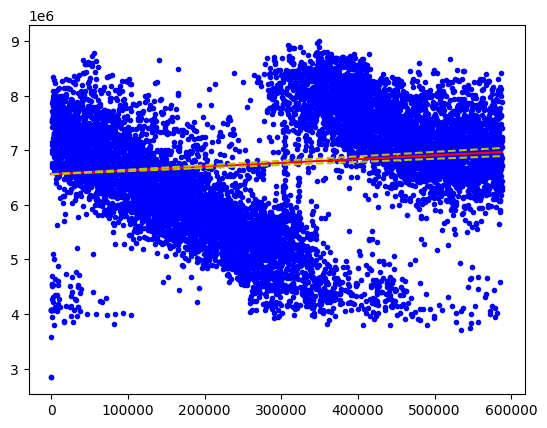

/content/Regressione/g_Vm2Regr.csv
Y_column:  allocated heap
Slope:  0.6709499304572171
Intercept:  5780180.563324536


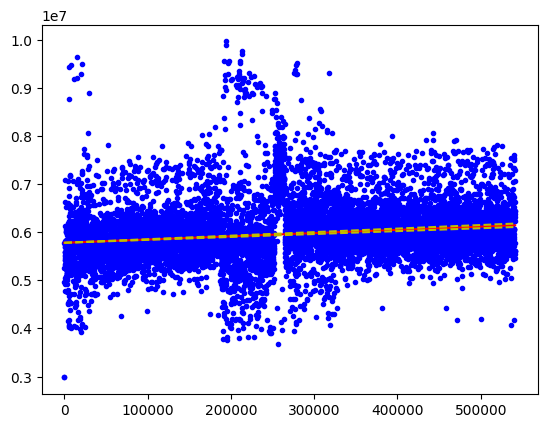

/content/Regressione/h_Vm3Regr.csv
Y_column:  allocated heap
Slope:  2.9030932760062105
Intercept:  6041585.556431387


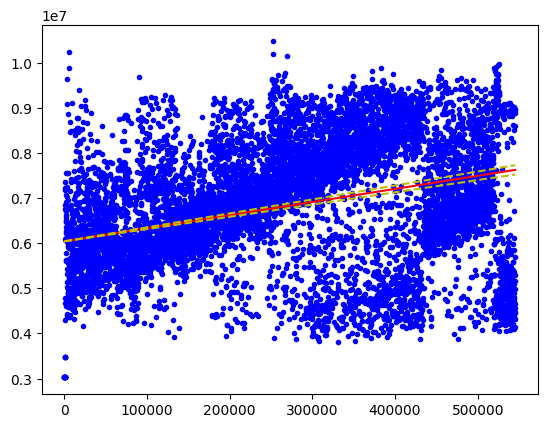

Nel file1 il valore 1437426462.1866782 secondi convertito in anni: 45.6 anni
Nel file2 il valore 1481809259.2381177 secondi convertito in anni: 47.0 anni
Nel file3 il valore 342379083.25527817 secondi convertito in anni: 10.9 anni


In [110]:
# Programma principale
if __name__ == "__main__":
    CsvFile = FileCsv()
    # Ottieni un elenco di tutti i file nella cartella
    elenco_file = os.listdir(Oss_path)
    #ordino file csv nella cartella
    elenco_file_ordinato = sorted(elenco_file)
    # Itera attraverso i file nella cartella
    for nome_file in elenco_file_ordinato:
        # Crea il percorso completo del file
        percorso_completo = os.path.join(Oss_path, nome_file)
        CsvFile.aggiungi_percorso_file(percorso_completo)
        #print(percorso_completo)

    #1)Conversione nel formato csv con separatore ;
    #CsvFile.ConvertiFormatoCSV()

    #2)Analisi Gruppo EXP
    #CsvFile.CalcolaExp()


    #3)Analisi Gruppo Oss
    #CsvFile.CalcolaOss()

    #4)Analisi Gruppo Vm
    CsvFile.CalcolaVm()

    #4.1) Calcolo
    CsvFile.Calcola_x()


